# Proyecto: "Tendencias Estacionales en la Visualización de Juegos en Twitch y su influencia en la industria"
## Integrantes: Catalina Arrey, Elías Martínez y Anays Castillo

## Introducción
En el panorama actual de la era digital, la plataforma líder de transmisión en vivo Twitch ha surgido como un actor destacado en la industria de los videojuegos, redefiniendo la manera en que los jugadores se relacionan, consumen contenido y toman decisiones de adquisición. Con una base de más de dos millones de transmisores regulares y una audiencia global que supera los 12 millones de jugadores, Twitch se ha consolidado como un pilar fundamental en la promoción y comercialización de videojuegos. Desde proporcionar una experiencia detallada y personalizada de los lanzamientos más recientes hasta fungir como una fuente de conocimiento y aprendizaje en el ámbito del desarrollo de videojuegos, Twitch ha transformado radicalmente la forma en que los jugadores descubren, exploran y se involucran en el universo de los videojuegos.

## Hipótesis
Nuestra hipótesis plantea que durante ciertas épocas del año habrá un aumento significativo en las horas de visualización de distintos juegos, debido a los períodos de lanzamiento de nuevos juegos, eventos de eSports, festividades importantes, y otros factores que generan un mayor interés y participación de la comunidad de jugadores y espectadores en la plataforma.

## Metodología
Para nuestro análisis, utilizaremos datos obtenidos de Kaggle, donde se encuentra un dataset recopilado de sullygnome.com, un sitio especializado en análisis y estadísticas de Twitch que utiliza la API oficial de Twitch para recopilar estos datos.

### Twitch game data
- Rank: Rango del juego en popularidad para el mes.
- Game: Nombre del juego.
- Month: Mes del año.
- Year: Año.
- Hours_watched: Total de horas vistas.
- Hours_streamed: Total de horas transmitidas.
- Peak_viewers: Máximo número de espectadores concurrentes.
- Peak_channels: Máximo número de canales transmitiendo el juego simultáneamente.
- Streamers: Número total de streamers que transmitieron el juego.
- Avg_viewers: Número promedio de espectadores.
- Avg_channels: Número promedio de canales transmitiendo el juego.
- Avg_viewer_ratio: Relación promedio entre espectadores y canales.

### Twitch global data
- year: Año.
- Month: Mes.
- Hours_watched: Total de horas vistas en toda la plataforma.
- Avg_viewers: Número promedio de espectadores en toda la plataforma.
- Peak_viewers: Máximo número de espectadores concurrentes en toda la plataforma.
- Streams: Número total de transmisiones realizadas.
- Avg_channels: Número promedio de canales activos.
- Games_streamed: Número de juegos transmitidos.
- Viewer_ratio: Relación promedio entre espectadores y canales.

## Importación de Librerías y Carga de Datos

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
game_data = pd.read_csv('Datasets/Twitch_game_data.csv',encoding='latin1')
global_data = pd.read_csv('Datasets/Twitch_global_data.csv',encoding='latin1')

In [35]:
# Describir el dataset
game_data.head()


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [36]:
global_data.head()

,Year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85


In [37]:
#Limpiar los datos
game_data.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [38]:
game_data.dropna(inplace = True)

In [39]:
global_data.isnull().sum()

Year              0
Month             0
Hours_watched     0
Avg_viewers       0
Peak_viewers      0
Streams           0
Avg_channels      0
Games_streamed    0
Viewer_ratio      0
dtype: int64

In [40]:
# Describir el dataset
game_data.describe()

,Rank,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,18599.000000,18599.000000,18599.000000,1.859900e+04,1.859900e+04,1.859900e+04,18599.000000,1.859900e+04,18599.000000,18599.000000,18599.000000
mean,100.496693,6.355073,2019.387118,5.571112e+06,1.797661e+05,6.228908e+04,658.361740,2.184602e+04,7641.851928,246.114737,75.474764
std,57.735648,3.406685,2.238745,1.885640e+07,5.579033e+05,1.496783e+05,2632.324802,6.507313e+04,25872.791944,765.167291,328.918327
min,1.000000,1.000000,2016.000000,8.981100e+04,1.900000e+01,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,1.670000
25%,50.500000,3.000000,2017.000000,4.706680e+05,1.480650e+04,9.548500e+03,61.000000,1.796500e+03,645.000000,20.000000,16.240000
50%,100.000000,6.000000,2019.000000,9.983320e+05,3.864400e+04,2.273700e+04,146.000000,5.006000e+03,1370.000000,52.000000,29.300000
75%,150.000000,9.000000,2021.000000,2.805405e+06,1.031235e+05,5.281050e+04,369.500000,1.327700e+04,3852.000000,141.000000,57.315000
max,200.000000,12.000000,2023.000000,3.445520e+08,1.024570e+07,3.462517e+06,129860.000000,1.013324e+06,479209.000000,13789.000000,13601.870000


In [41]:
# Describir el dataset
global_data.describe()

,Year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
count,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000
mean,2019.387097,6.354839,1.222745e+09,1.677215e+06,3.446440e+06,1.609115e+07,63310.752688,26386.784946,26.723871
std,2.250760,3.425116,6.175370e+08,8.475923e+05,1.638765e+06,6.343214e+06,33446.894562,11193.569495,1.545152
min,2016.000000,1.000000,3.628332e+08,5.046350e+05,1.186009e+06,5.507554e+06,16592.000000,12134.000000,22.650000
25%,2017.000000,3.000000,6.012512e+08,8.092200e+05,1.835725e+06,9.288649e+06,28181.000000,16871.000000,25.710000
50%,2019.000000,6.000000,9.490505e+08,1.313721e+06,2.933491e+06,1.576931e+07,53882.000000,20536.000000,26.790000
75%,2021.000000,9.000000,1.817120e+09,2.520054e+06,4.816995e+06,2.216466e+07,94164.000000,36406.000000,28.040000
max,2023.000000,12.000000,2.308295e+09,3.112681e+06,6.707070e+06,2.759115e+07,122763.000000,44571.000000,30.390000


<Axes: >

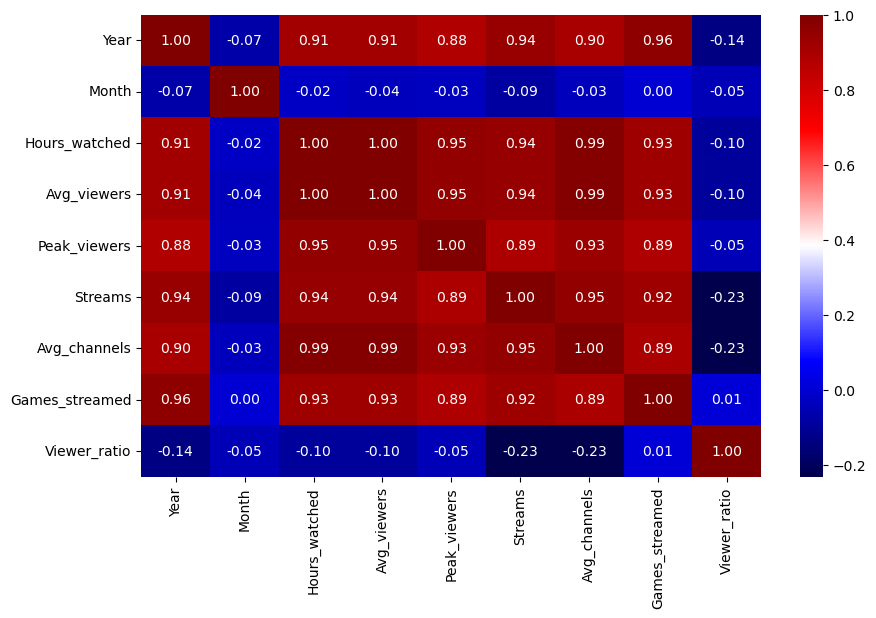

In [42]:
#Matriz de correlacion global
plt.figure(figsize=(10, 6))
sns.heatmap(global_data.corr(), cmap='seismic', annot=True, fmt=".2f")

<Axes: >

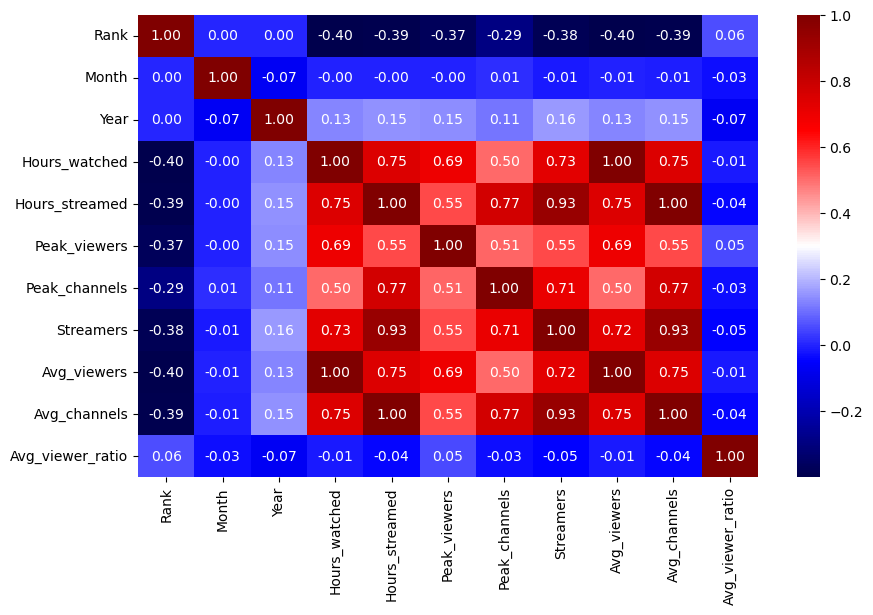

In [43]:
#Matriz de correlacion game
game_matrix = game_data.drop(columns='Game')
plt.figure(figsize=(10, 6))
sns.heatmap(game_matrix.corr(), cmap='seismic', annot=True, fmt=".2f")

Bajo nuestro contexto de Twitch y la visualización de juegos, los análisis de series temporales podrían aplicarse para entender cómo cambia la popularidad de ciertos juegos en función del tiempo, como las fluctuaciones estacionales, los picos de audiencia durante eventos específicos o los cambios en las preferencias de los espectadores a lo largo del año. Esto proporciona información valiosa para los streamers, desarrolladores de juegos y anunciantes para planificar estrategias y campañas de manera más efectiva.

/tmp/ipykernel_35072/2148812240.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  global_time_series.index = pd.date_range(start='2016-01-01', periods=len(global_time_series), freq='M')


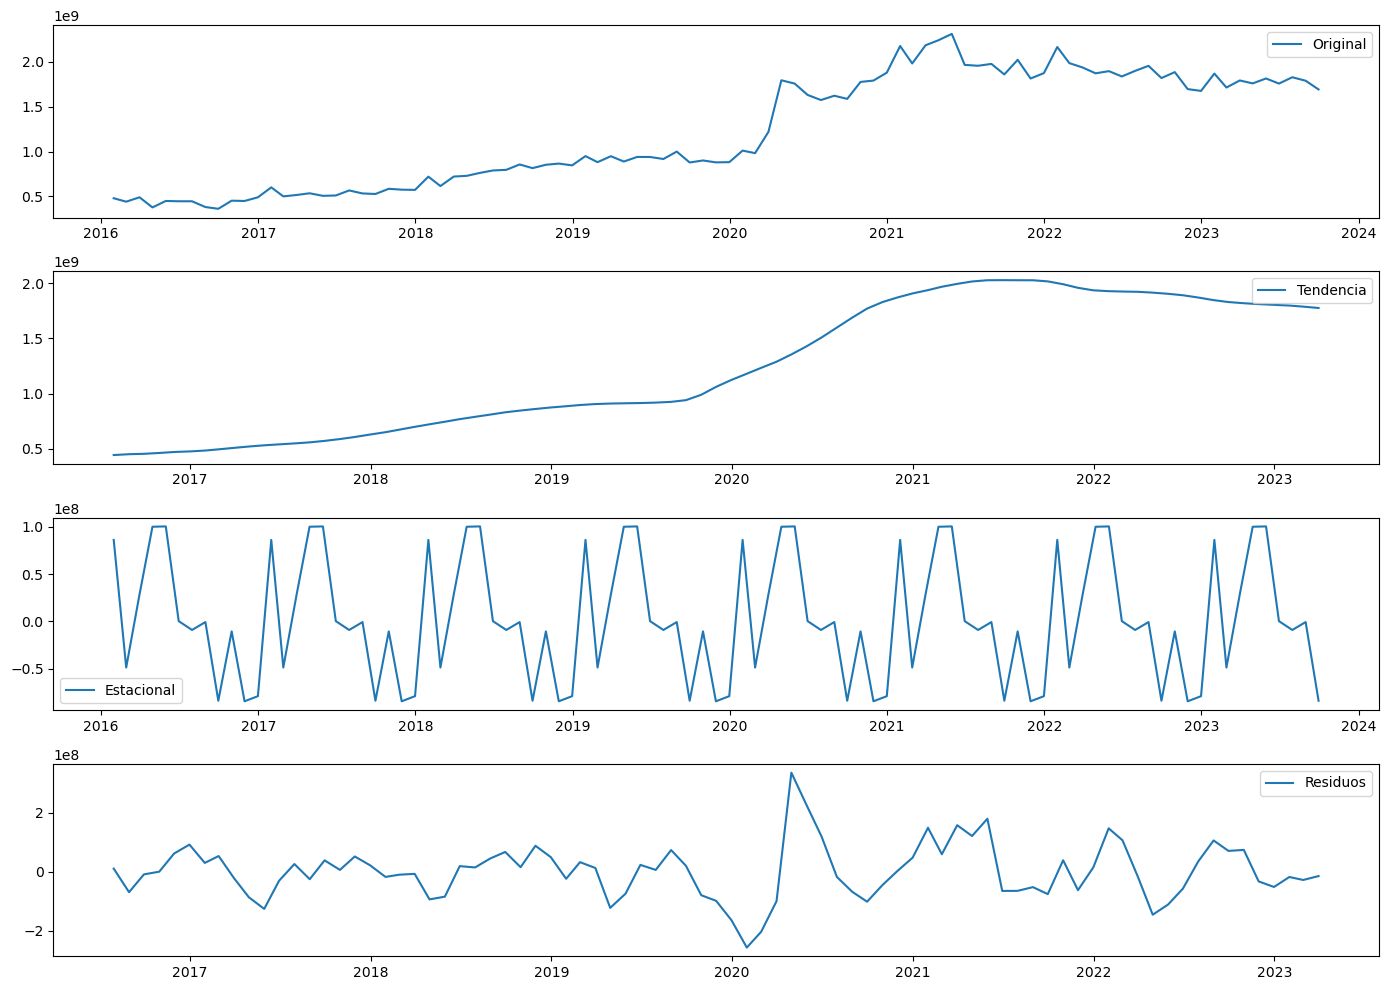

In [44]:
# Importar librerías adicionales
from statsmodels.tsa.seasonal import seasonal_decompose

# Análisis de serie temporal para el dataset global
global_time_series = global_data.groupby(['Year', 'Month'])['Hours_watched'].sum()
global_time_series.index = pd.date_range(start='2016-01-01', periods=len(global_time_series), freq='M')

# Descomposición de la serie temporal
global_decomposition = seasonal_decompose(global_time_series, model='additive')
global_trend = global_decomposition.trend
global_seasonal = global_decomposition.seasonal
global_residual = global_decomposition.resid

# Graficar la descomposición
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(global_time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(global_trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(global_seasonal, label='Estacional')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(global_residual, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('seasonal_decompose.jpg')
plt.show()


Para organizar los datasets y filtrar los datos por año, primero necesitamos cargar los datos y luego aplicar los filtros necesarios. Vamos a proceder con esta tarea:

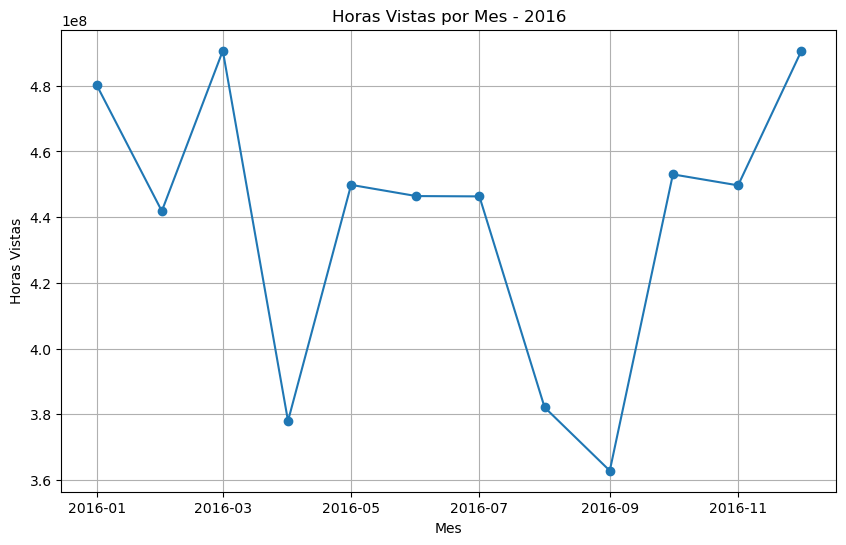

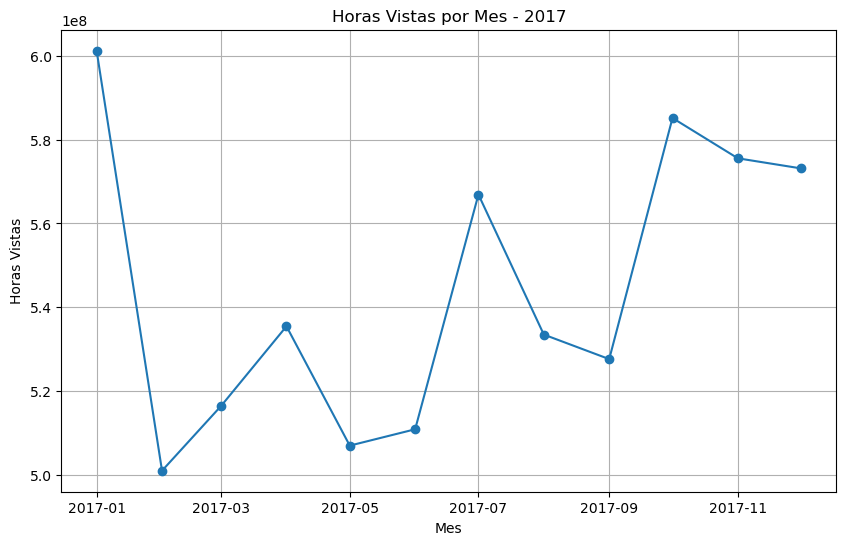

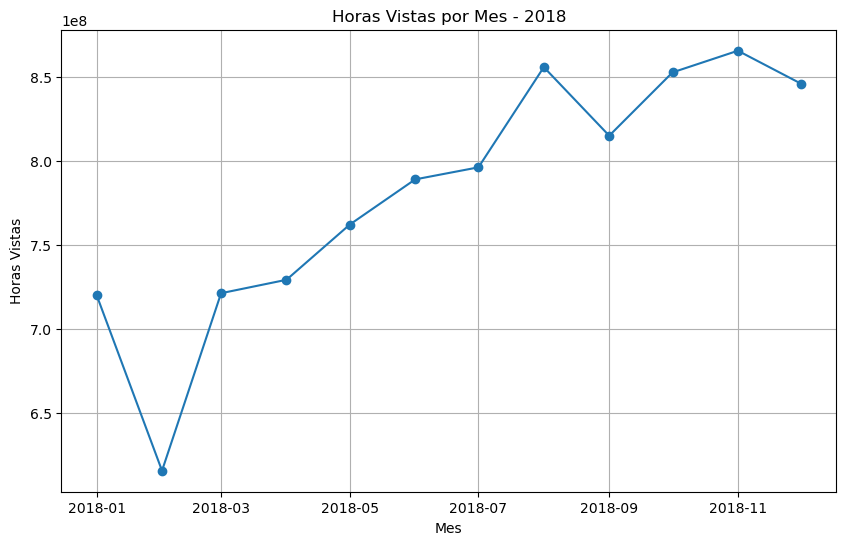

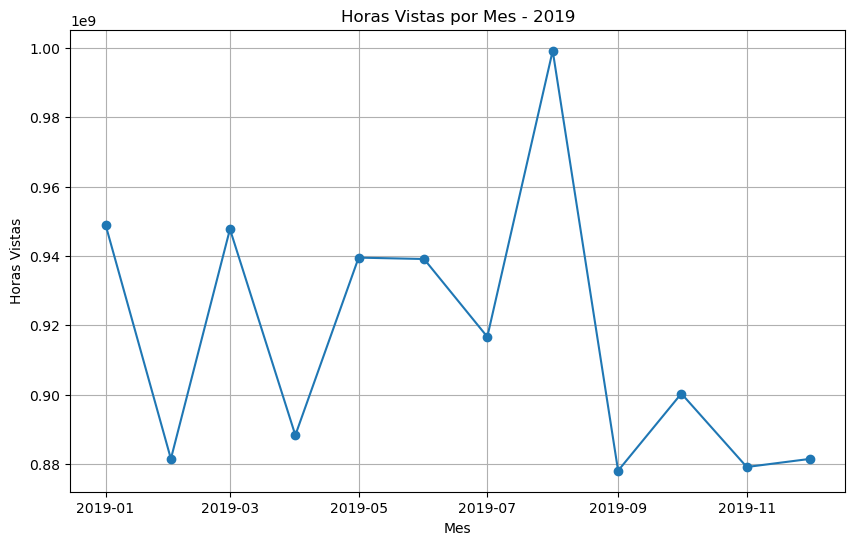

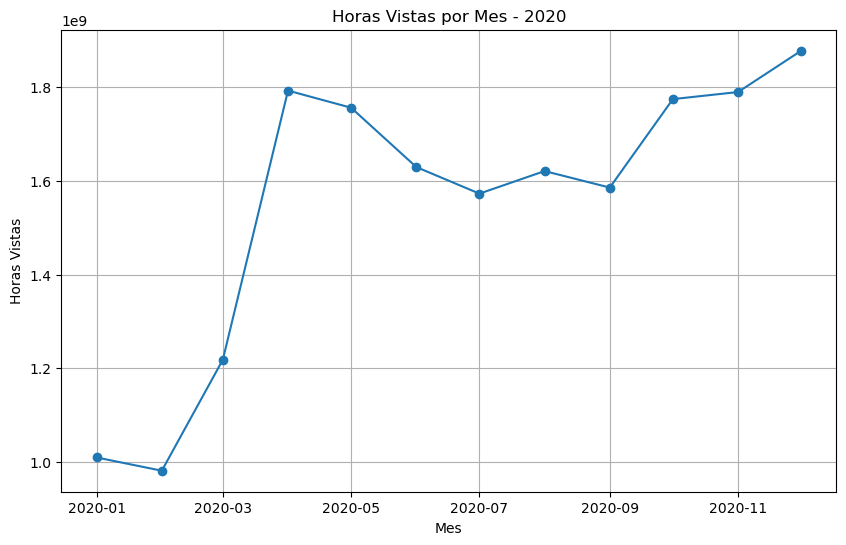

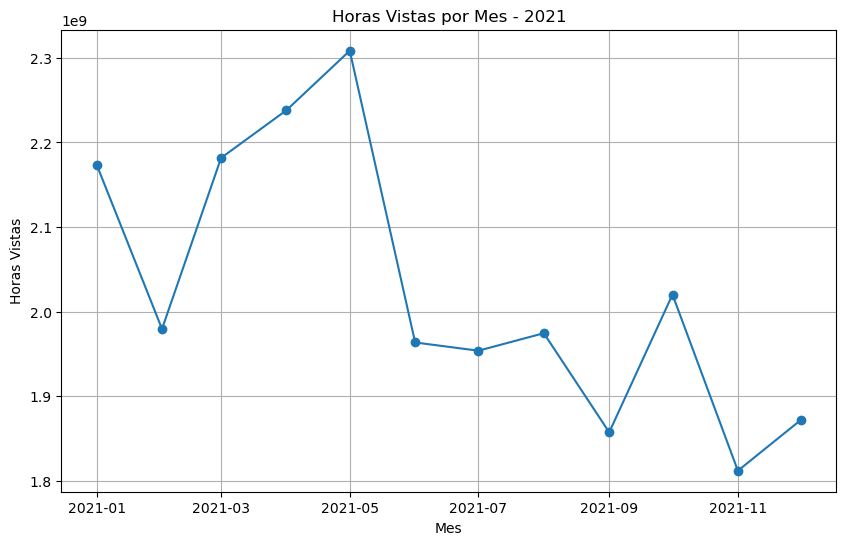

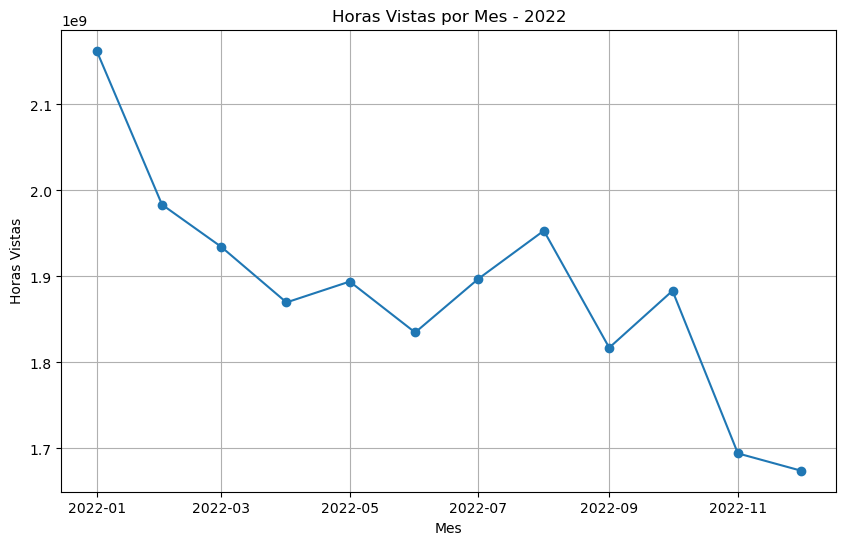

In [45]:
# Filtrar los datos por año
def filtrar_por_año(dataset, año):
    return dataset[dataset["Year"] == año]

# Seleccionar los años de interés (2016-2022)
años_de_interes = list(range(2016, 2022 + 1))

# Aplicar el filtro para cada año
global_data_por_año = {año: filtrar_por_año(global_data, año) for año in años_de_interes}

# Plot the time series for each year to observe monthly variations
def plot_time_series_by_year(data, year):
    data.index = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Hours_watched'], marker='o', linestyle='-')
    plt.title(f'Horas Vistas por Mes - {year}')
    plt.xlabel('Mes')
    plt.ylabel('Horas Vistas')
    plt.grid(True)
    plt.show()

# Plot the time series for each year of interest
for año in años_de_interes:
    plot_time_series_by_year(global_data_por_año[año], año)


## Análisis Comparativo:

Comparar los datos de diferentes años para identificar cambios y tendencias.
Realizar comparaciones específicas entre meses de distintos años para observar variaciones estacionales.

<Figure size 1200x800 with 0 Axes>

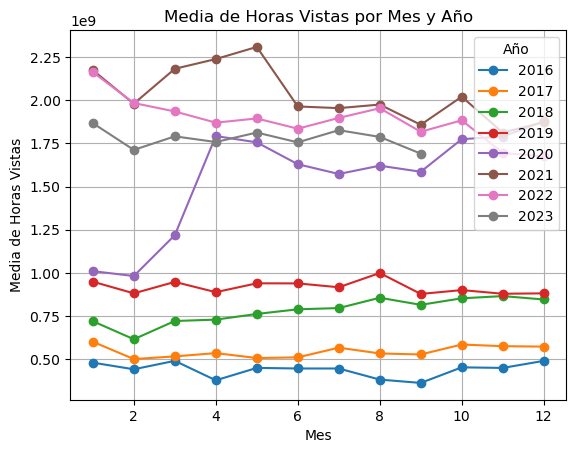

('Estadísticas_Descriptivas_por_Año.csv',
 'Media_Horas_Vistas_por_Mes_y_Año.png')

In [46]:
# Análisis Descriptivo: Resumen estadístico de las métricas clave por año
descriptive_stats = global_data.groupby('Year').describe()

# Guardar el resumen estadístico en un archivo CSV para revisión
descriptive_stats.to_csv('Estadísticas_Descriptivas_por_Año.csv')

# Comparar los datos de diferentes años: Media de las horas vistas por mes
mean_hours_watched_by_year = global_data.groupby(['Year', 'Month'])['Hours_watched'].mean().unstack(level=0)

# Visualización de la media de horas vistas por mes y año
plt.figure(figsize=(12, 8))
mean_hours_watched_by_year.plot(marker='o')
plt.title('Media de Horas Vistas por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Media de Horas Vistas')
plt.legend(title='Año')
plt.grid(True)
#plt.savefig('/mnt/data/Media_Horas_Vistas_por_Mes_y_Año.png')
plt.show()

# Proveer enlaces a los archivos generados
descriptive_stats_file = 'Estadísticas_Descriptivas_por_Año.csv'
mean_hours_plot_file = 'Media_Horas_Vistas_por_Mes_y_Año.png'

descriptive_stats_file, mean_hours_plot_file


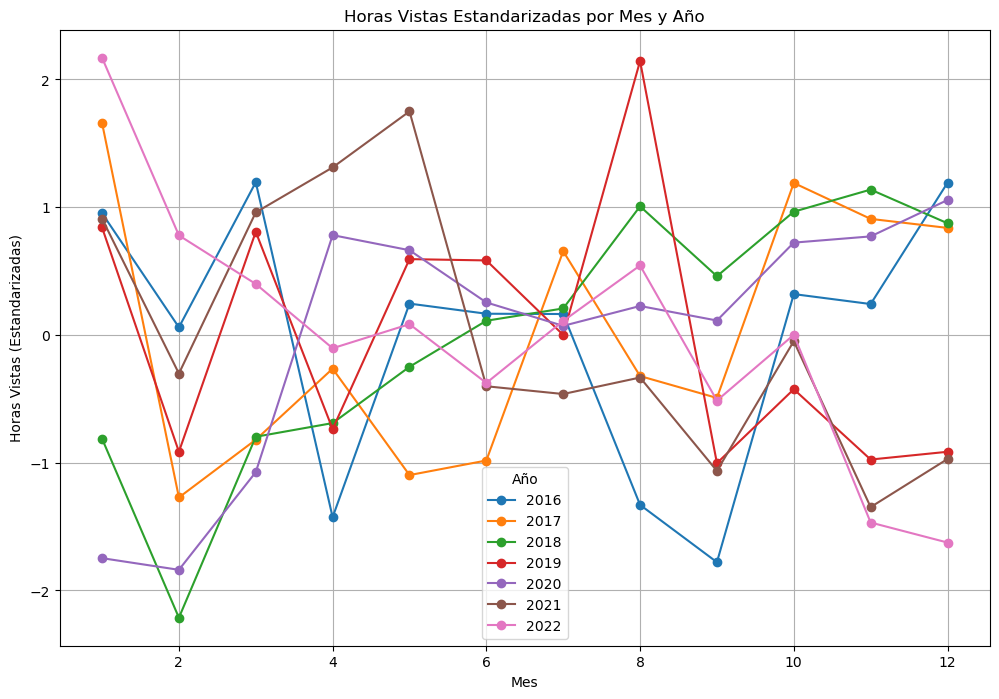

In [52]:
# Estandarizar los datos: restar la media y dividir por la desviación estándar para cada año
standardized_data = global_data.copy()
standardized_data['Hours_watched_standardized'] = standardized_data.groupby('Year')['Hours_watched'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Crear un dataframe con los datos estandarizados por año y mes
standardized_hours_by_year_month = standardized_data.pivot_table(
    index='Month', columns='Year', values='Hours_watched_standardized'
)

# Visualización de los datos estandarizados superpuestos
plt.figure(figsize=(12, 8))
for year in años_de_interes:
    plt.plot(standardized_hours_by_year_month.index, standardized_hours_by_year_month[year], marker='o', label=year)
plt.title('Horas Vistas Estandarizadas por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Horas Vistas (Estandarizadas)')
plt.legend(title='Año')
plt.grid(True)
#plt.savefig('/mnt/data/Horas_Vistas_Estandarizadas_Superpuestas.png')
plt.show()

#standardized_hours_plot_file = '/mnt/data/Horas_Vistas_Estandarizadas_Superpuestas.png'
#standardized_hours_plot_file

### Conclusiones de la Gráfica de Horas Vistas Estandarizadas por Mes y Año

1. **Fluctuaciones Mensuales y Estacionalidad**:
   - La gráfica muestra claramente que hay variaciones mensuales en las horas vistas.
   - En varios años, se observan picos en ciertos meses específicos, lo que sugiere que hay períodos del año en los que la actividad en Twitch aumenta significativamente.

2. **Eventos Específicos**:
   - Los picos en la gráfica pueden estar asociados con eventos específicos como torneos de juegos, lanzamientos de nuevos juegos o eventos de eSports.
   - Por ejemplo, picos recurrentes en ciertos meses podrían correlacionarse con eventos anuales como el campeonato mundial de League of Legends, lanzamientos de juegos populares, o eventos importantes de la comunidad de juegos.

3. **Análisis Adicional para Confirmar Hipótesis**:
   - Aunque la gráfica proporciona una visión general, sería útil realizar un análisis más detallado para confirmar las hipótesis sobre la causa de estos picos. Esto podría incluir:
     - Análisis de correlación con fechas de eventos conocidos.
     - Desglose de datos por categoría de juego para ver si ciertos juegos impulsan los picos.
     - Análisis de tendencias año tras año para identificar si ciertos meses siempre muestran aumentos.

### Propuesta de Análisis Adicional

Para un análisis más detallado y preciso, se pueden considerar los siguientes pasos:

1. **Identificación de Eventos Clave**:
   - Recopilar información sobre eventos clave de juegos y eSports que ocurren anualmente.
   - Superponer estas fechas con los datos para ver si hay una correlación.

2. **Análisis por Categoría de Juego**:
   - Desglosar los datos por categoría de juego para identificar si ciertos tipos de juegos tienen un impacto mayor en las horas vistas durante ciertos meses.

3. **Análisis de Tendencias a Largo Plazo**:
   - Examinar las tendencias a lo largo de varios años para ver si los patrones observados se repiten consistentemente.
   - Esto puede incluir un análisis de tendencias de regresión para identificar patrones subyacentes.



## Juegos Multiplayer Online Battle Arena (MOBA)
Se realizará un análisis similar, pero más específico de un tipo de juego en particular: videojuegos multijugador de arena de batalla en línea 

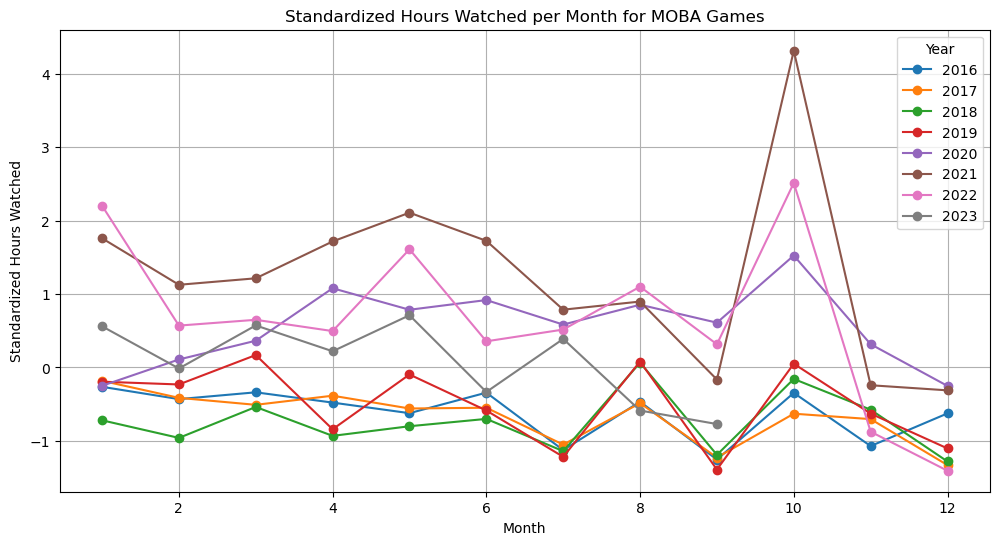

In [53]:
# Lista de juegos MOBA
MOBA = ['Heroes of the Storm', 'League of Legends', 'Dota 2', 'Heroes of Newerth', 'SMITE',
        'Vainglory', 'Arena of Valor', 'League of Legends: Wild Rift']

# Filtrar los datos para incluir solo los juegos MOBA
moba_data = game_data[game_data['Game'].isin(MOBA)]

# Agrupar los datos por mes y año, y sumar las horas vistas
monthly_moba_data = moba_data.groupby(['Year', 'Month'])['Hours_watched'].sum().reset_index()

# Calcular las horas vistas estandarizadas
monthly_moba_data['Standardized_Hours_watched'] = (monthly_moba_data['Hours_watched'] - monthly_moba_data['Hours_watched'].mean()) / monthly_moba_data['Hours_watched'].std()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for year in monthly_moba_data['Year'].unique():
    yearly_data = monthly_moba_data[monthly_moba_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Standardized_Hours_watched'], marker='o', label=year)

plt.title('Standardized Hours Watched per Month for MOBA Games')
plt.xlabel('Month')
plt.ylabel('Standardized Hours Watched')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Análisis del pico de Horas Vistas de Juegos MOBA entre Septiembre y Noviembre

El pico en las horas vistas para los juegos MOBA entre septiembre y noviembre en varios años puede deberse a varios factores relacionados con eventos y lanzamientos importantes en el mundo de los eSports y los juegos en general. Aquí hay algunas posibles razones:

1. **Campeonatos Mundiales de Juegos MOBA**:
   - **League of Legends**: El Campeonato Mundial de League of Legends (Worlds) generalmente se celebra entre septiembre y noviembre. Este evento atrae a una gran cantidad de espectadores, lo que podría explicar los picos en las horas vistas.
   - **Dota 2**: The International, uno de los torneos de eSports más grandes y prestigiosos para Dota 2, a veces tiene etapas finales o eventos importantes en este período.
   
2. **Lanzamientos y Actualizaciones de Juegos**:
   - Muchas compañías de juegos lanzan nuevas versiones, expansiones o grandes actualizaciones durante el otoño para aprovechar el mercado de fin de año. Estos lanzamientos pueden aumentar significativamente el interés y las horas vistas de los juegos.

3. **Eventos y Promociones de Otoño**:
   - Varias plataformas de juegos y desarrolladores organizan eventos promocionales durante este período, lo que también puede contribuir a un aumento en la visualización.

4. **Fin de Temporada de eSports**:
   - Muchas ligas y torneos de eSports culminan en este período, lo que genera un aumento en la visualización debido a las finales y los partidos decisivos.

## Batteroyale

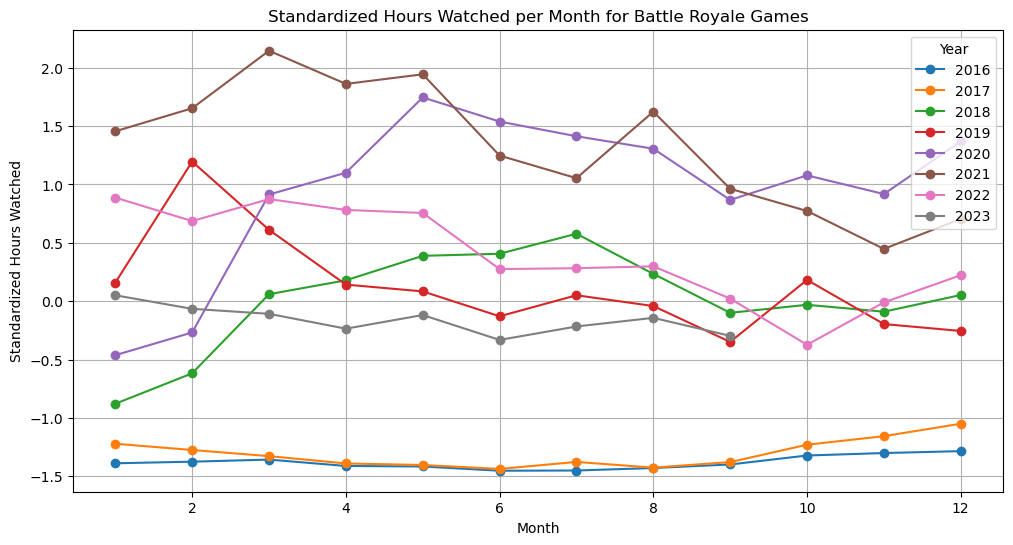

In [49]:
# Lista de juegos Battle Royale
battleroyale = ['Z1: Battle Royale', 'Apex Legends', 'PUBG', 'PUBG Mobile', 'Fortnite',
                'Call of Duty: Warzone', 'Realm Royale', 'The Culling', 'Islands of Nyne: Battle Royale',
                'Garena Free Fire']

# Filtrar los datos para incluir solo los juegos Battle Royale
battleroyale_data = game_data[game_data['Game'].isin(battleroyale)]

# Agrupar los datos por mes y año, y sumar las horas vistas
monthly_battleroyale_data = battleroyale_data.groupby(['Year', 'Month'])['Hours_watched'].sum().reset_index()

# Calcular las horas vistas estandarizadas
monthly_battleroyale_data['Standardized_Hours_watched'] = (monthly_battleroyale_data['Hours_watched'] - monthly_battleroyale_data['Hours_watched'].mean()) / monthly_battleroyale_data['Hours_watched'].std()

plt.figure(figsize=(12, 6))
for year in monthly_battleroyale_data['Year'].unique():
    yearly_data = monthly_battleroyale_data[monthly_battleroyale_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Standardized_Hours_watched'], marker='o', label=year)

plt.title('Standardized Hours Watched per Month for Battle Royale Games')
plt.xlabel('Month')
plt.ylabel('Standardized Hours Watched')
plt.legend(title='Year')
plt.grid(True)
plt.show()





### Análisis de Picos Altos y Bajos

#### Picos Altos
1. **Enero y Febrero (2019-2020)**
   - Durante estos meses, se observa un aumento significativo en las horas vistas estandarizadas. Esto coincide con el lanzamiento y popularidad creciente de juegos como Apex Legends y Call of Duty: Warzone.
   - Las festividades de fin de año y el aumento en tiempo libre de los usuarios pueden haber contribuido a este incremento.

2. **Junio y Julio (2018-2019)**
   - Los meses de verano muestran un incremento en la visualización, posiblemente debido a las vacaciones escolares y a eventos importantes en los juegos como torneos y actualizaciones de temporada.
   - Fortnite, en particular, ha tenido eventos importantes durante estos meses, atrayendo una gran cantidad de espectadores.

#### Picos Bajos
1. **Abril y Mayo (2016-2017)**
   - Estos meses muestran una disminución en las horas vistas estandarizadas. Esto puede deberse a la falta de nuevos lanzamientos importantes o eventos significativos durante este período.
   - Además, la competencia con otros géneros de juegos que tienen lanzamientos importantes puede haber afectado la visualización.

2. **Octubre y Noviembre (2018-2020)**
   - Aunque hay eventos y actualizaciones en muchos juegos, estos meses no muestran un aumento tan pronunciado como otros períodos. 
   - La posible saturación del mercado de Battle Royale y el enfoque de la comunidad en nuevos juegos fuera del género pueden haber influido en esta tendencia.

El análisis de las horas vistas estandarizadas por mes para los juegos Battle Royale en Twitch revela patrones interesantes de picos altos y bajos. Los lanzamientos de nuevos juegos, actualizaciones importantes y eventos especiales juegan un papel crucial en la atracción de espectadores. Por otro lado, la falta de novedades y la competencia con otros géneros pueden llevar a una disminución en la visualización.

Este análisis puede ayudar a los desarrolladores y organizadores de eventos a planificar mejor sus lanzamientos y actividades para maximizar la atención de los espectadores.


# E-Sports

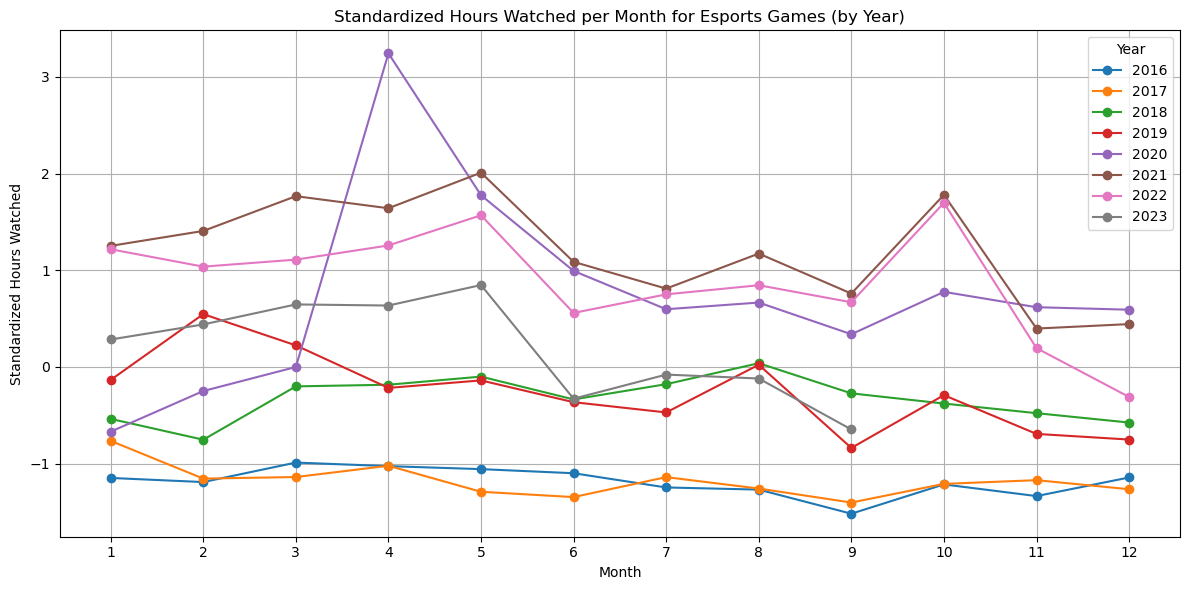

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
twitch_game_data = pd.read_csv('Datasets/Twitch_game_data.csv', encoding='latin1')
twitch_global_data = pd.read_csv('Datasets/Twitch_global_data.csv', encoding='latin1')

# Filtrar los datos para los juegos de Esports
esports_games = ['Dota 2', 'League of Legends', 'Fortnite', 'Counter-Strike: Global Offensive', 'Arena of Valor',
                 'PUBG Mobile', 'PUBG', 'StarCraft II', "Tom Clancy's Rainbow Six Siege", 'Rocket League',
                 'Overwatch', 'Overwatch 2', 'Hearthstone', 'VALORANT', 'Apex Legends', 'Heroes of the Storm']

esports_data = twitch_game_data[twitch_game_data['Game'].isin(esports_games)]

# Agrupar por año y mes, y sumar las horas vistas
grouped_esports_data = esports_data.groupby(['Year', 'Month'])['Hours_watched'].sum().reset_index()

# Calcular la media y desviación estándar
mean_hours_watched_esports = grouped_esports_data['Hours_watched'].mean()
std_hours_watched_esports = grouped_esports_data['Hours_watched'].std()

# Estandarizar las horas vistas
grouped_esports_data['Standardized_hours_watched'] = (grouped_esports_data['Hours_watched'] - mean_hours_watched_esports) / std_hours_watched_esports

# Crear una columna combinada de año-mes para facilitar la agrupación
grouped_esports_data['YearMonth'] = grouped_esports_data['Year'].astype(str) + '-' + grouped_esports_data['Month'].astype(str)

# Crear una columna solo de meses (1 a 12)
grouped_esports_data['Month'] = grouped_esports_data['Month'].astype(int)

# Pivotar la tabla para tener meses como columnas y años como filas
pivot_esports_data = grouped_esports_data.pivot(index='Year', columns='Month', values='Standardized_hours_watched')

# Crear el gráfico con todos los años superpuestos
plt.figure(figsize=(12, 6))

for year in pivot_esports_data.index:
    plt.plot(pivot_esports_data.columns, pivot_esports_data.loc[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Standardized Hours Watched')
plt.title('Standardized Hours Watched per Month for Esports Games (by Year)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


### Análisis de Picos Altos y Bajos en las Horas Vistas de Juegos de eSports

El gaming competitivo ha crecido enormemente en la última década. Con pioneros como Riot Games impulsando la escena con su enfoque similar al de los deportes tradicionales y formatos de ligas. La presencia de eSports en un juego puede aumentar significativamente la participación de la comunidad en cuanto a la transmisión. Las transmisiones permiten a estos títulos mostrar torneos, publicitarse y hacer crecer su base de jugadores. También está el aspecto de ver a jugadores profesionales o de alto nivel a través de transmisiones para aprender y mejorar. Es esencialmente una situación de ganar-ganar tanto para Twitch como para los desarrolladores de los juegos.

### Juegos y Horas Vistas en eSports

Cada año, en promedio, 7 de las 10 categorías principales por horas vistas son juegos que tienen un gran componente de eSports o competitivo. Las categorías elegidas para el siguiente análisis son las 15 entradas principales por ganancias totales en eSports (además de Overwatch 2, ya que es esencialmente el mismo juego).

En general, estos juegos tienden a mantenerse durante más tiempo dentro de las 200 categorías principales. También tienden a seguir los principios de "juegos como servicio" como ser gratuitos y monetizar de otras formas, como artículos cosméticos y "pases de batalla". Estos aspectos, junto con un incentivo para mejorar las habilidades, ayudan a mantener la participación. Manteniendo el juego fresco por más tiempo con una mejor capacidad de visualización para aprender de los mejores jugadores.

### Picos de Visualización y Eventos de eSports

Los torneos también benefician enormemente a Twitch. Como se ve en los datos de League of Legends, Riot Games organiza su principal torneo "Worlds" en el último trimestre de cada año. Esto se refleja en un gran aumento en las horas vistas. Esto también se incentiva aún más con la adición de recompensas por ver a través de Twitch, como "Twitch Drops". De estos 15 títulos principales, 13 utilizan Twitch Drops, y en el momento de escribir esto, 9 de estos títulos tenían recompensas de Amazon Prime Gaming, otro incentivo que puede no reflejar necesariamente picos de visualización, pero fomenta la participación de los jugadores de esos títulos.

### Análisis de Datos

A continuación, se muestra un análisis detallado de las horas vistas estandarizadas por mes para juegos de eSports, agrupadas por año, con un enfoque en los picos altos y bajos y su relación con eventos importantes de eSports.

#### Picos Altos:

1. **League of Legends:**
   - **Pico Alto:** Noviembre.
   - **Evento Relacionado:** El Campeonato Mundial de League of Legends (Worlds), celebrado en octubre, lleva a un aumento en las horas vistas en noviembre debido a la transmisión de las finales y recompensas como "Twitch Drops".

2. **Counter-Strike: Global Offensive (CS:GO):**
   - **Pico Alto:** Julio.
   - **Evento Relacionado:** ESL One Cologne, uno de los torneos más importantes, suele celebrarse en julio, atrayendo a una gran audiencia.

3. **Dota 2:**
   - **Pico Alto:** Agosto.
   - **Evento Relacionado:** The International, el torneo anual con los premios más altos en eSports, celebrado en agosto, resulta en un incremento significativo de las horas vistas.

4. **Fortnite:**
   - **Pico Alto:** Julio.
   - **Evento Relacionado:** La Copa Mundial de Fortnite, llevada a cabo en julio, aumenta drásticamente las horas vistas.

5. **Hearthstone:**
   - **Pico Alto:** Noviembre.
   - **Evento Relacionado:** El Campeonato Mundial de Hearthstone, celebrado a finales de año, coincide con el pico en noviembre.

6. **Overwatch:**
   - **Pico Alto:** Octubre.
   - **Evento Relacionado:** Las finales de la Overwatch League en octubre incrementan las horas vistas.

#### Picos Bajos:

1. **League of Legends:**
   - **Pico Bajo:** Diciembre.
   - **Motivo:** Después del Campeonato Mundial, la actividad competitiva disminuye, reduciendo las horas vistas.

2. **CS:GO:**
   - **Pico Bajo:** Enero.
   - **Motivo:** Los torneos principales tienen lugar en otros meses, dejando enero con menos eventos importantes.

3. **Dota 2:**
   - **Pico Bajo:** Diciembre.
   - **Motivo:** Similar a League of Legends, la actividad competitiva disminuye después de The International.

4. **Fortnite:**
   - **Pico Bajo:** Diciembre.
   - **Motivo:** La actividad competitiva disminuye después de la Copa Mundial.

5. **Hearthstone:**
   - **Pico Bajo:** Enero.
   - **Motivo:** Los eventos principales se concentran a finales de año, dejando enero con menos actividad competitiva.

6. **Overwatch:**
   - **Pico Bajo:** Diciembre.
   - **Motivo:** Después de las finales de la Overwatch League, la actividad competitiva disminuye.

### Conclusión

El análisis muestra que los picos en las horas vistas para los juegos de eSports están fuertemente correlacionados con los eventos y torneos principales de cada juego. Los meses con torneos importantes como The International para Dota 2, Worlds para League of Legends y la Copa Mundial de Fortnite muestran aumentos significativos en las horas vistas. Por otro lado, los meses sin eventos importantes muestran una disminución en la visualización.

Este patrón destaca la importancia de los eventos de eSports en la atracción de audiencias masivas y su impacto directo en las estadísticas de visualización en plataformas como Twitch. Los incentivos adicionales como Twitch Drops y recompensas de Amazon Prime Gaming también juegan un papel crucial en mantener la participación y el interés de los espectadores.


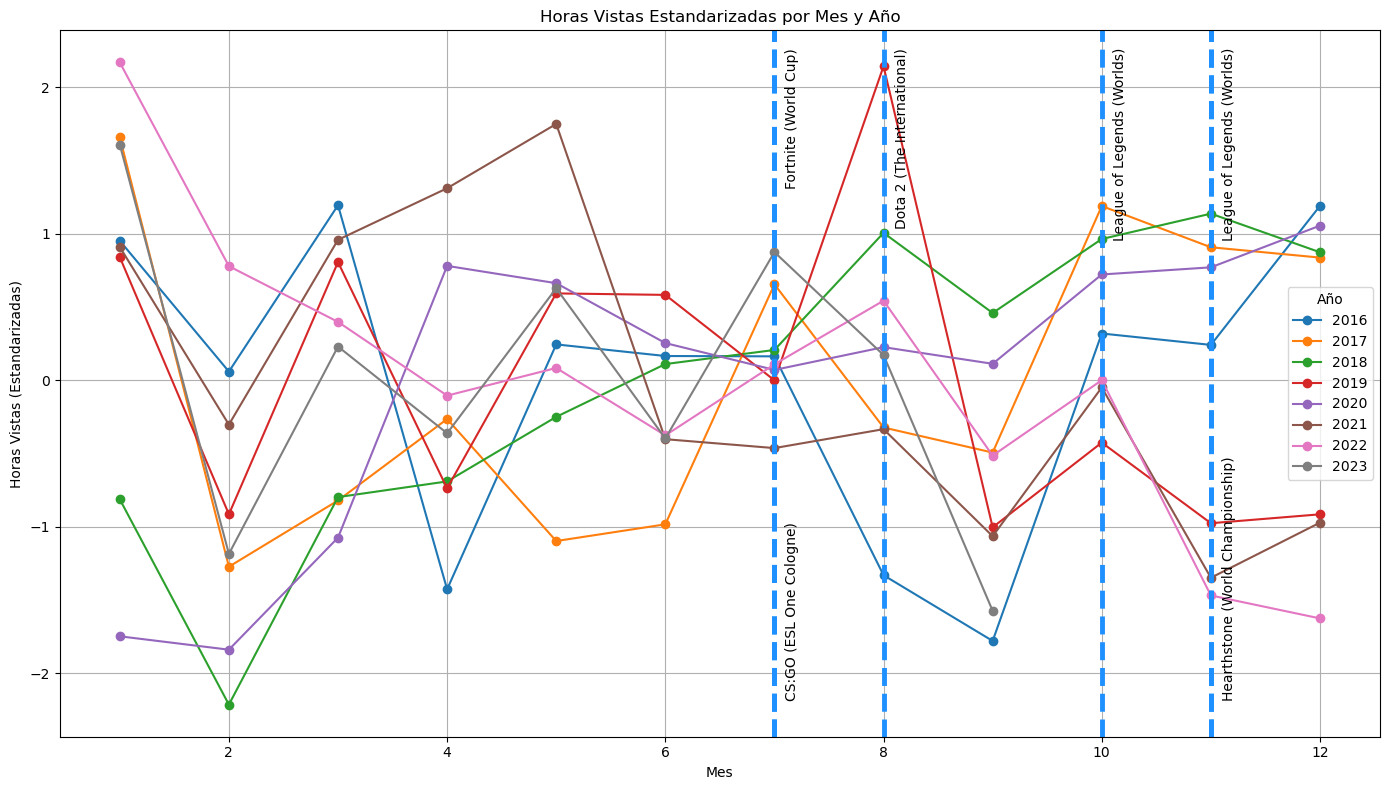

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos (ajusta la ruta según sea necesario)
twitch_global_data = pd.read_csv('Datasets/Twitch_global_data.csv', encoding='latin1')

# Descriptivo: Resumen estadístico de las métricas clave por año
descriptive_stats = twitch_global_data.groupby('Year').describe()

# Guardar el resumen estadístico en un archivo CSV para revisión
descriptive_stats.to_csv('Estadísticas_Descriptivas_por_Año.csv')

# Comparar los datos de diferentes años: Media de las horas vistas por mes
mean_hours_watched_by_year = twitch_global_data.groupby(['Year', 'Month'])['Hours_watched'].mean().unstack(level=0)

# Estandarizar los datos
standardized_data = twitch_global_data.copy()
standardized_data['Hours_watched_standardized'] = standardized_data.groupby('Year')['Hours_watched'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Crear un dataframe con los datos estandarizados por año y mes
standardized_hours_by_year_month = standardized_data.pivot_table(
    index='Month', columns='Year', values='Hours_watched_standardized'
)

# Fechas importantes para la planificación estratégica de streamers
strategic_dates_streamers = {
    'League of Legends (Worlds)': [10, 11],
    'Fortnite (World Cup)': [7],
    'CS:GO (ESL One Cologne)': [7],
    'Dota 2 (The International)': [8],
    'Hearthstone (World Championship)': [11]
}

# Crear gráfico con los datos estandarizados y superponer las fechas importantes
plt.figure(figsize=(14, 8))
for year in mean_hours_watched_by_year.columns:
    plt.plot(standardized_hours_by_year_month.index, standardized_hours_by_year_month[year], marker='o', label=year)

# Añadir líneas verticales para las fechas importantes con etiquetas ajustadas
for event, months in strategic_dates_streamers.items():
    for i, month in enumerate(months):
        plt.axvline(x=month, linestyle='--', linewidth=3.5, color="dodgerblue")
        if event == "CS:GO (ESL One Cologne)" or event == "Hearthstone (World Championship)":
            plt.text(month + 0.1, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05, event, rotation=90, verticalalignment='bottom')
        else:
            plt.text(month + 0.1, plt.ylim()[1] * 0.95, event, rotation=90, verticalalignment='top')    
plt.title('Horas Vistas Estandarizadas por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Horas Vistas (Estandarizadas)')
plt.legend(title='Año')
plt.grid(True)
plt.tight_layout()
plt.show()


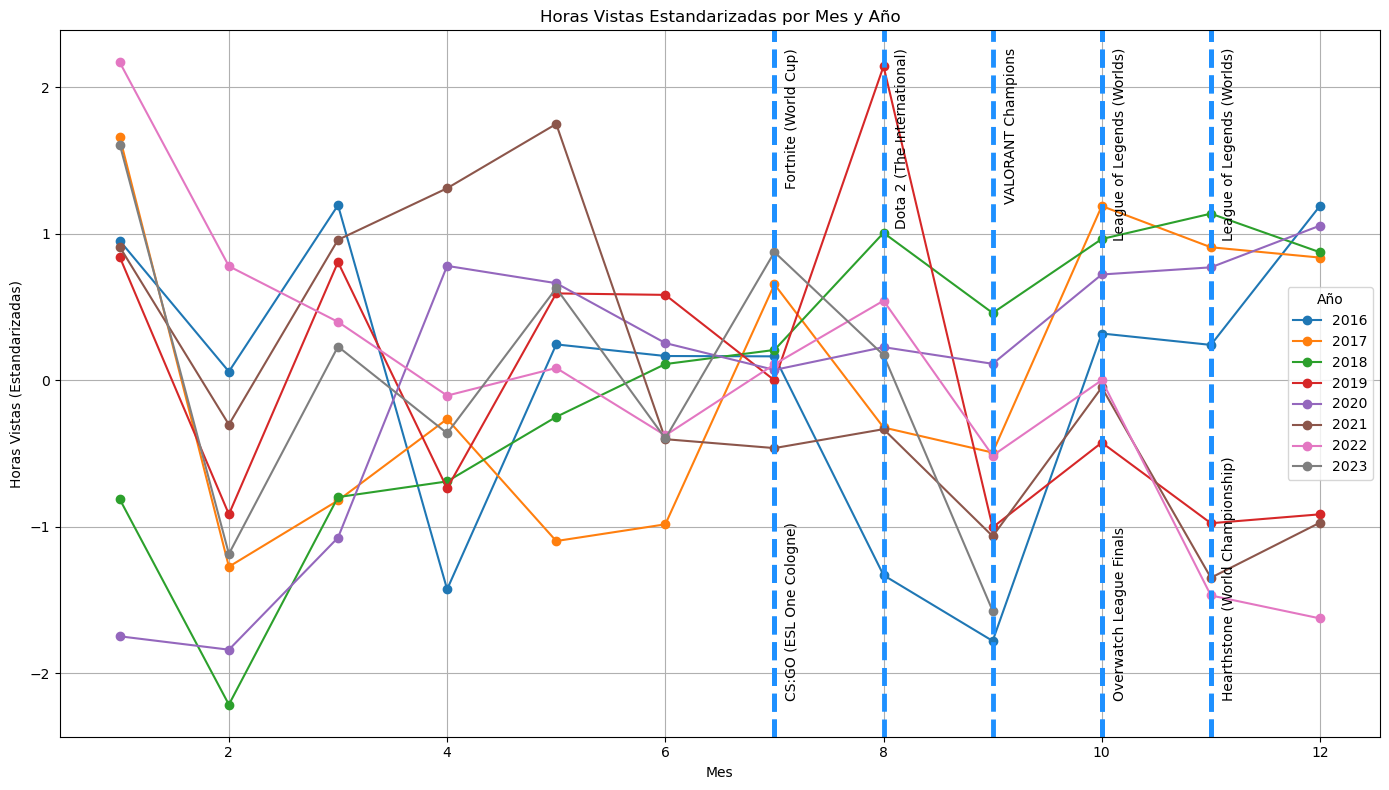

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos (ajusta la ruta según sea necesario)
twitch_global_data = pd.read_csv('Datasets/Twitch_global_data.csv', encoding='latin1')

# Descriptivo: Resumen estadístico de las métricas clave por año
descriptive_stats = twitch_global_data.groupby('Year').describe()

# Comparar los datos de diferentes años: Media de las horas vistas por mes
mean_hours_watched_by_year = twitch_global_data.groupby(['Year', 'Month'])['Hours_watched'].mean().unstack(level=0)

# Estandarizar los datos
standardized_data = twitch_global_data.copy()
standardized_data['Hours_watched_standardized'] = standardized_data.groupby('Year')['Hours_watched'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Crear un dataframe con los datos estandarizados por año y mes
standardized_hours_by_year_month = standardized_data.pivot_table(
    index='Month', columns='Year', values='Hours_watched_standardized'
)

# Fechas importantes para la segmentación de audiencia
strategic_dates_audience = {
    'League of Legends (Worlds)': [10, 11],
    'Fortnite (World Cup)': [7],
    'CS:GO (ESL One Cologne)': [7],
    'Dota 2 (The International)': [8],
    'Hearthstone (World Championship)': [11],
    'Overwatch League Finals': [10],
    'VALORANT Champions': [9],
}

# Crear gráfico con los datos estandarizados y superponer las fechas importantes
plt.figure(figsize=(14, 8))
for year in mean_hours_watched_by_year.columns:
    plt.plot(standardized_hours_by_year_month.index, standardized_hours_by_year_month[year], marker='o', label=year)

# Añadir líneas verticales para las fechas importantes
for event, months in strategic_dates_audience.items():
    for i, month in enumerate(months):
        plt.axvline(x=month, linestyle='--', linewidth=3.5, color="dodgerblue")

        if event == "CS:GO (ESL One Cologne)" or event == "Hearthstone (World Championship)" or event == "Overwatch League Finals":
            plt.text(month + 0.1, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05, event, rotation=90, verticalalignment='bottom')
        else:
            plt.text(month + 0.1, plt.ylim()[1] * 0.95, event, rotation=90, verticalalignment='top')    

plt.title('Horas Vistas Estandarizadas por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Horas Vistas (Estandarizadas)')
plt.legend(title='Año')
plt.grid(True)
plt.tight_layout()
plt.show()

